In [102]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from utils import mnist_reader
from utils.data_load import load
import codes
# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Problem 4: Linear Regression
Please follow our instructions in the same order to solve the linear regresssion problem.

Please print out the entire results and codes when completed.

In [103]:
def get_data():
    """
    Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.   
    """
    X_train, y_train = load('./data/regression/regression_train.csv')
    X_test, y_test = load('./data/regression/regression_test.csv')
    X_valid, y_valid = load('./data/regression/regression.valid.csv')
    return X_train, y_train, X_test, y_test, X_valid, y_valid

X_train, y_train, X_test, y_test, X_valid, y_valid= get_data()  


print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)
print('Valid data shape: ',X_valid.shape)
print('Valid target shape: ',y_valid.shape)

Train data shape:  (30, 1)
Train target shape:  (30,)
Test data shape:  (30, 1)
Test target shape:  (30,)
Valid data shape:  (20, 1)
Valid target shape:  (20,)


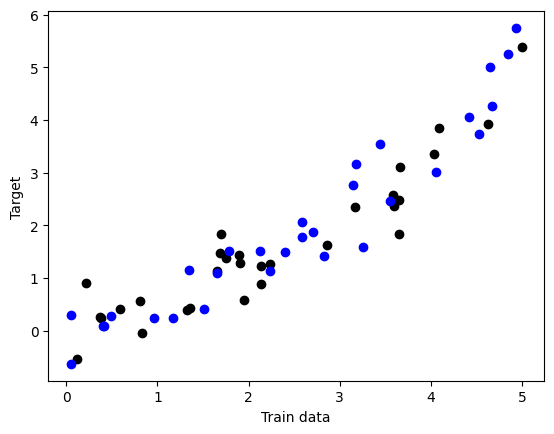

In [104]:
## PART (a): 
## Plot the training and test data ##

plt.plot(X_train, y_train,'o', color='black')
plt.plot(X_test, y_test,'o', color='blue')
plt.xlabel('Train data')
plt.ylabel('Target')
plt.show()

## Training Linear Regression
In the following cells, you will build a linear regression. You will implement its loss function, then subsequently train it with gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the opimal solution using closed form expression.

In [105]:
from codes.Regression import Regression

In [106]:
## PART (c): 
## Complete loss_and_grad function in Regression.py file and test your results.
regression = Regression(m=1, reg_param=0)
loss, grad = regression.loss_and_grad(X_train,y_train)
print('Loss value',loss)
print('Gradient value',grad)
##

Loss value 1.0455416122950603
Gradient value [[1.33142275]
 [2.65167278]]


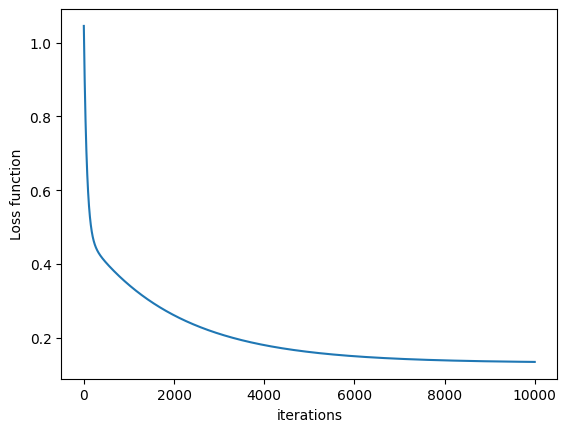

[[-0.2444182 ]
 [ 0.83978488]]
Final loss: 0.13458201902518097


In [77]:
## PART (d): 
## Complete train_LR function in Regression.py file 
loss_history, theta = regression.train_LR(X_train,y_train, alpha=1e-3, B=30, num_iters=10000)
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print(theta)
print('Final loss:',loss_history[-1])

Learning Rate	Final Loss
0.1000		0.1321
0.0100		0.1321
0.0010		0.1346
0.0001		0.3434


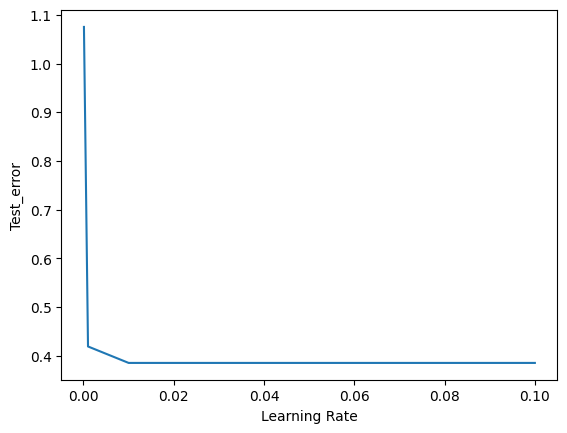

In [78]:
## PART (d) (Different Learning Rates):
from numpy.linalg import norm
alphas = [1e-1, 1e-2, 1e-3, 1e-4]

# Create a table to store the final objective function values
table = []
for alpha in alphas:
    regression = Regression(m=1, reg_param=0)
    loss_history, _ = regression.train_LR(X_train, y_train, alpha=alpha, B=30, num_iters=10000)
    final_loss = loss_history[-1]
    table.append([alpha, final_loss])

# Print the table
print("Learning Rate\tFinal Loss")
for row in table:
    print("{:.4f}\t\t{:.4f}".format(row[0], row[1]))

# Plot the test error
test_err = np.zeros((len(alphas),1))
for i in range(len(alphas)):
    alpha = alphas[i]
    regression = Regression(m=1, reg_param=0)
    loss_history, _ = regression.train_LR(X_train, y_train, alpha=alpha, B=30, num_iters=10000)
    y_pred = regression.predict(X_test)
    test_err[i] = np.sum(np.square(y_pred - y_test)) / len(y_test)
fig = plt.figure()
plt.plot(alphas,test_err)
plt.xlabel('Learning Rate')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./LR_lr_test.pdf')

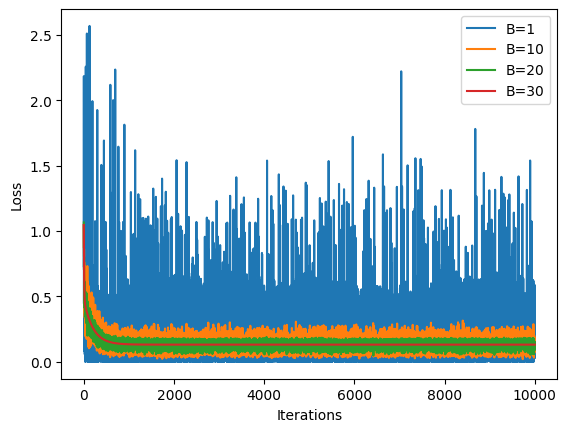

In [107]:
## PART (d) (Different Batch Sizes):
from numpy.linalg import norm
Bs = [1, 10, 20, 30]
test_err = np.zeros((len(Bs),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Linear regression for different learning rates
# ================================================================ #
loss_histories = []
for B in Bs:
    LR = Regression(m = 1, reg_param = 0)
    loss_history, theta = LR.train_LR(X_train, y_train, alpha=0.01, B=B, num_iters=10000)
    loss_histories.append(loss_history)
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
for i, B in enumerate(Bs):
    plt.plot(loss_histories[i], label=f'B={B}')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()
fig.savefig('./LR_Batch_test.pdf')

In [109]:
## PART (e): 
## Complete closed_form function in Regression.py file
loss_2, theta_2 = regression.closed_form(X_train, y_train)
print('Optimal solution loss',loss_2)
print('Optimal solution gradient',theta_2)

Optimal solution loss 0.2641793820396444
Optimal solution gradient [-0.37906992  0.8852483 ]


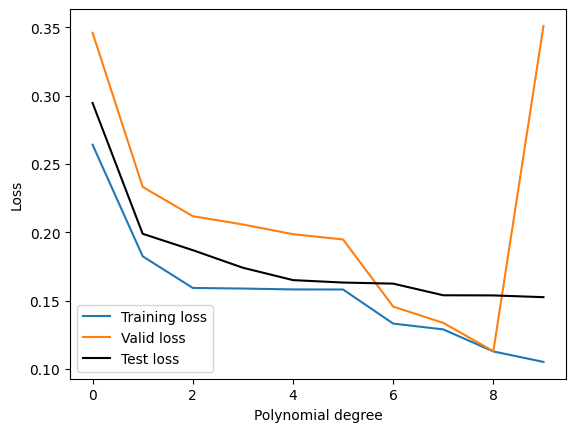

In [111]:
## PART (f): 
train_loss=np.zeros((10,1))
valid_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
tr_loss = []
v_loss = []
te_loss = []
for i in range(1, 11):
    regression = Regression(m = i, reg_param = 0)
    train_loss, _ = regression.closed_form(X_train, y_train)
    tr_loss.append(train_loss)
    valid_loss, _ = regression.closed_form(X_valid, y_valid)
    v_loss.append(valid_loss)
    test_loss, _ = regression.closed_form(X_test, y_test)
    te_loss.append(test_loss)

plt.plot(tr_loss, label='Training loss')
plt.plot(v_loss, label='Valid loss')
plt.plot(te_loss, label='Test loss', color='black')
plt.legend()
plt.xlabel('Polynomial degree')
plt.ylabel('Loss')
plt.show()

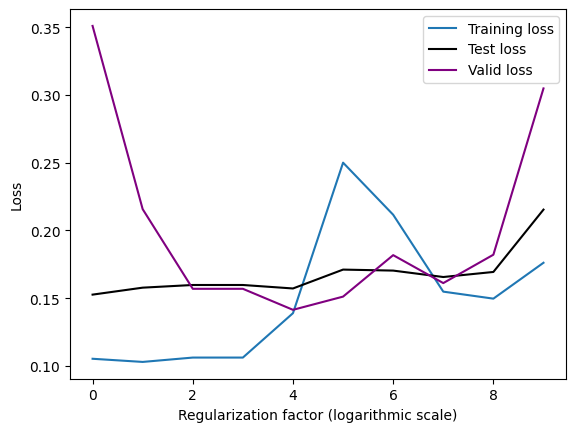

In [112]:
#PART (g): 
train_loss=np.zeros((10,1))
valid_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))

lambdas = [0, 1e-8, 1e-7, 1e-7, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot the training, validation and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
tr_loss = []
v_loss = []
te_loss = []
for l in lambdas:
    regression = Regression(m = 10, reg_param = l)
    train_loss, _ = regression.closed_form(X_train, y_train)
    tr_loss.append(train_loss)
    valid_loss, _ = regression.closed_form(X_valid, y_valid)
    v_loss.append(valid_loss)
    test_loss, _ = regression.closed_form(X_test, y_test)
    te_loss.append(test_loss)

plt.plot(tr_loss, label='Training loss')
plt.plot(te_loss, label='Test loss', color='black')
plt.plot(v_loss, label='Valid loss', color="purple")
plt.legend()
plt.xlabel('Regularization factor (logarithmic scale)')
plt.ylabel('Loss')
plt.show()

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #


# Problem 5: Binary Classification

Please follow our instructions in the same order to solve the binary classification problem.
Please print out the entire results and codes when completed.

In [113]:
X_train, y_train = mnist_reader.load_mnist('./data/mnist', kind='train')
X_test, y_test = mnist_reader.load_mnist('./data/mnist', kind='t10k')

print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (60000, 576)
Train target shape:  (60000,)
Test data shape:  (10000, 576)
Test target shape:  (10000,)


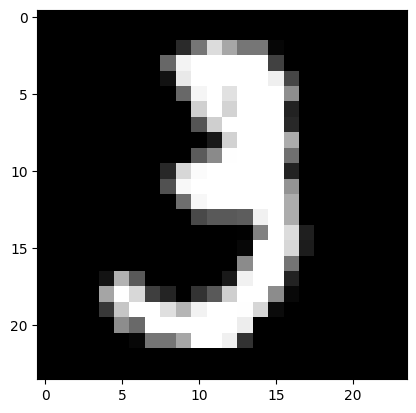

Label is Odd


In [114]:
# PART (a): 
# To Visualize a point in the dataset
index = 10
X = np.array(X_train[index], dtype='uint8').reshape([24, 24])
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
if y_train[index] in set([1, 3, 5, 7, 9]):
    label = 'Odd'
else:
    label = 'Even'
print('Label is', label)


## Train Perceptron
In the following cells, you will build Perceptron Algorithm.

Final loss:  0.103
L2 norm:  28276672.74259594
Test set accuracy: 0.17%


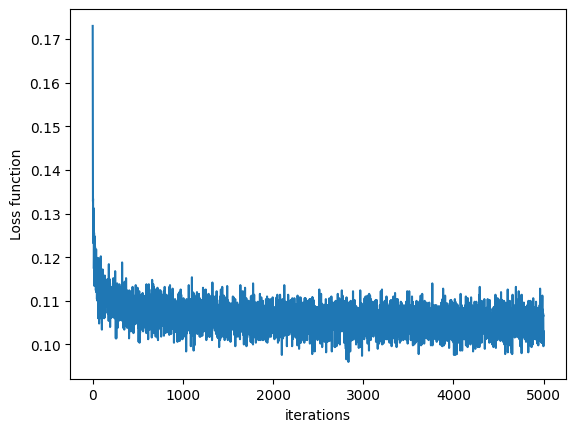

In [115]:
# Preprocess y_train and y_test
y_train = np.where(y_train % 2 == 0, 1, -1)
y_test = np.where(y_test % 2 == 0, 1, -1)

# PART (b),(c):
# Implement the perceptron Algorithm and compute the percentage of mis-classified point
n = X_train.shape[0] # Number of data point train
n_test = X_test.shape[0] # Number of data point test
d = X_train.shape[1] # Number of features
loss_hist = []
theta = np.zeros((d+1,1))
X_train_h = np.hstack((np.ones((n,1)), X_train))
X_test_h = np.hstack((np.ones((n_test,1)), X_test))
learning_rate = 0.01


# Perceptron Algorithm
for i in range(5000):
    misclassified = 0
    for j in range(5000):
        x = X_train_h[j]
        y = y_train[j]
        temp = theta.T
        c = np.dot(temp, x)
        h = y * c
        if h <= 0:
            misclassified += 1
            theta = theta.T + (learning_rate * y * x)
            theta = theta.T
    loss_hist.append(misclassified / 5000.0)

plt.plot(loss_hist)
plt.xlabel('iterations')
plt.ylabel('Loss function')
print("Final loss: ", loss_hist[-1])
l2_norm = np.sum(np.square(theta))
print("L2 norm: ", l2_norm)

# Compute the percentage of misclassified points in the test data

mistakes = 0
for j in range(5000):
    x = X_test_h[j]
    y = y_test[j]
    temp = theta.T
    c = np.dot(temp, x)
    h = y * c
    if h <= 0:
        mistakes += 1
accuracy = mistakes / 5000.0
print("Test set accuracy: {:.2f}%".format(accuracy))


28276672.74259594
